In [ ]:
# Importing all necessery librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#importing the dataset
df=pd.read_excel("train.xlsx")


For my model i only consider the Positive and Negative Sentiments.
And filter the Data in Excel accordingly. Due to facing some issues with google colab   

In [ ]:
df.head()

,Sentiment,Reviews
0,0,Enna da ellam avan seyal Mari iruku
1,0,This movei is just like ellam avan seyal
2,1,Padam vanthathum 13k dislike pottavaga yellam...
3,1,Neraya neraya neraya... ... V era level...thala
4,1,wow thavala sema mass....padam oru pundaikum ...



> **1. EDA**



---



In [ ]:
df.describe()

,Sentiment
count,12596.000000
mean,0.838282
std,0.368207
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12596 entries, 0 to 12595
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  12596 non-null  int64 
 1   Reviews    12596 non-null  object
dtypes: int64(1), object(1)
memory usage: 196.9+ KB


In [ ]:
df['Sentiment'].value_counts()

1    10559
0     2037
Name: Sentiment, dtype: int64

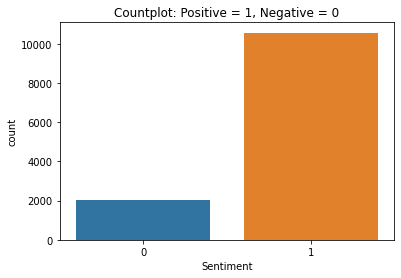

In [ ]:
sns.countplot(x=df['Sentiment']);
plt.title("Countplot: Positive = 1, Negative = 0");

In [ ]:
df.head()

,Sentiment,Reviews
0,0,Enna da ellam avan seyal Mari iruku
1,0,This movei is just like ellam avan seyal
2,1,Padam vanthathum 13k dislike pottavaga yellam...
3,1,Neraya neraya neraya... ... V era level...thala
4,1,wow thavala sema mass....padam oru pundaikum ...


**DATA Preprocessing**

In [ ]:
# cleaning the Data.

In [ ]:
import re

In [ ]:
# Code for removing non ascii characters (Tamil unicode) from the reviews
def non_ascii(text):
    text=text.lower()
    text=re.sub(r'[^\x00-\x7f]',"",text)
    return text

In [ ]:
df['Reviews']=df['Reviews'].apply(non_ascii)

In [ ]:
#df.to_excel('new_train1.xlsx')

In [ ]:
# To remove the non alphanumeric characters
def remove_unwanted(text):
    x=''
    for i in text:
        if i.isalpha():
            x=x+i
        else:
            x=x+' '
    return x

In [ ]:
df['Reviews']=df['Reviews'].apply(remove_unwanted)

In [ ]:
#df.to_excel('new_train2.xlsx')

In [ ]:
# To remove extra spaces
def remove_spaces(text):
    text = re.sub(' +', ' ', text)
    return text

In [ ]:
df['Reviews']=df['Reviews'].apply(remove_spaces)

In [ ]:
#df.to_excel('new_train3.xlsx')

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# To convert into tokens
def word_tokenize(text):
    text=nltk.word_tokenize(text)
    return text

In [ ]:
df['Reviews']=df['Reviews'].apply(word_tokenize)

In [ ]:
#df.to_excel('new_train4.xlsx')

In [ ]:
# Function to remove consecutive duplicates 
def remove_duplicate(List):
    list1=[]
    len1=len(List)
    for i in range(len1):
        temp=List[i]
        t=''
        for j in temp:
            if(t=='' or j!=t[len(t)-1]):
                t=t+j
        list1.append(t)
    return list1
            


In [ ]:
remove_duplicate(['vera', 'lvl', 'thala', 'sammaaaaaaaaaaaaa', 'bgm', 'sammaya','fooor'])

['vera', 'lvl', 'thala', 'sama', 'bgm', 'samaya', 'for']

In [ ]:
df['Reviews']=df['Reviews'].apply(remove_duplicate)
df['Reviews_new']=df['Reviews'].apply(remove_duplicate)

In [ ]:
df.head(1)

,Sentiment,Reviews,Reviews_new
0,0,"[ena, da, elam, avan, seyal, mari, iruku]","[ena, da, elam, avan, seyal, mari, iruku]"


In [ ]:
#df.to_excel('new_train5.xlsx')

In [ ]:
def list_to_string(List):
    temp=" ".join(List)
    return temp

In [ ]:
list_to_string(['vera', 'lvl', 'thala', 'sama', 'bgm', 'samaya', 'for'])

'vera lvl thala sama bgm samaya for'

In [ ]:
df['Reviews']=df['Reviews'].apply(list_to_string)

**Sampling**

In [ ]:
#pip install imblearn

In [ ]:
#from imblearn.over_sampling import RandomOverSampler

In [ ]:
#ros = RandomOverSampler(random_state=0)

In [ ]:
#x_ros,y_ros=ros.fit_resample(x,y)

**Segregeting dependent and independent features**

In [ ]:
x=df['Reviews']
x_new=df['Reviews_new']

In [ ]:
x.shape

(12596,)

In [ ]:
y=df['Sentiment']

In [ ]:
y.shape

(12596,)

In [ ]:
x.head()

0                    ena da elam avan seyal mari iruku
1              this movei is just like elam avan seyal
2    padam vanthathum k dislike potavaga yelam yea ...
3               neraya neraya neraya v era level thala
4      wow thavala sema mas padam oru pundaikum agathu
Name: Reviews, dtype: object

**Spliting the Dataset into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y,test_size=0.3,random_state=1)

In [ ]:
x_train.shape,x_test.shape

((8817,), (3779,))

In [ ]:
y_train.value_counts()

1    7381
0    1436
Name: Sentiment, dtype: int64

In [ ]:
y_test.value_counts()

1    3178
0     601
Name: Sentiment, dtype: int64

In [ ]:
y_train.shape,y_test.shape

((8817,), (3779,))


> **2. Vectorization(Bag of Words, TF-IDF, Word2vec)**



---



Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_vectorizer=CountVectorizer(stop_words='english', lowercase=False, preprocessor=None, tokenizer=None)

In [ ]:
bag_of_words=bow_vectorizer.fit_transform(x_train).toarray()

In [ ]:
bag_of_words.shape

(8817, 12178)

In [ ]:
print(bag_of_words)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


TF-IDF (Term Frequency–Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', lowercase=False, preprocessor=None, tokenizer=None)

In [ ]:
tf_idf=tfidf_vectorizer.fit_transform(x_train)

In [ ]:
tf_idf.shape 

(8817, 12178)

In [ ]:
print(tf_idf)

  (0, 11861)	0.8807501898696926
  (0, 4726)	0.4735811472646481
  (1, 11753)	0.17741675985447072
  (1, 11356)	0.24152410580223221
  (1, 5960)	0.4020366569089447
  (1, 11111)	0.4020366569089447
  (1, 3530)	0.2820275790953301
  (1, 473)	0.17821270059996475
  (1, 10096)	0.34269077009776955
  (1, 11110)	0.4020366569089447
  (1, 279)	0.3382898251715771
  (1, 5074)	0.2600247541846457
  (1, 9761)	0.1204151759725585
  (2, 1630)	0.4554250039465444
  (2, 361)	0.261536983764886
  (2, 6427)	0.19077214179211277
  (2, 1691)	0.27028955434445945
  (2, 2969)	0.28660637800399846
  (2, 9976)	0.4554250039465444
  (2, 8463)	0.32744703611432024
  (2, 9795)	0.421387761011197
  (2, 11753)	0.20097676957652508
  (3, 5019)	0.5770877924034222
  (3, 11753)	0.5778196706912493
  (3, 5074)	0.4234307343843619
  :	:
  (8812, 9761)	0.16193515213635507
  (8813, 11945)	0.49286219379661445
  (8813, 11517)	0.4147327150679607
  (8813, 1793)	0.43358554066390836
  (8813, 2511)	0.3253962110652104
  (8813, 11322)	0.29017855960738

Word2Vec

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import Word2Vec

In [ ]:
word_vec=Word2Vec(sentences=x_train_new,min_count=1)

In [ ]:
words_wrdvec=word_vec.wv.vocab

In [ ]:
print(words_wrdvec)

{'like': <gensim.models.keyedvectors.Vocab object at 0x7f01166224d0>, 'wow': <gensim.models.keyedvectors.Vocab object at 0x7f011b69ee10>, 'so': <gensim.models.keyedvectors.Vocab object at 0x7f011b69ec90>, 'thala': <gensim.models.keyedvectors.Vocab object at 0x7f011b69ed90>, 'mas': <gensim.models.keyedvectors.Vocab object at 0x7f011b69eb50>, 'ah': <gensim.models.keyedvectors.Vocab object at 0x7f011b693510>, 'varuvenga': <gensim.models.keyedvectors.Vocab object at 0x7f011b693550>, 'theriyum': <gensim.models.keyedvectors.Vocab object at 0x7f011b6935d0>, 'ana': <gensim.models.keyedvectors.Vocab object at 0x7f011b69ed50>, 'ivlo': <gensim.models.keyedvectors.Vocab object at 0x7f011b69ec50>, 'varuvenganu': <gensim.models.keyedvectors.Vocab object at 0x7f011b693650>, 'nenaikala': <gensim.models.keyedvectors.Vocab object at 0x7f011b693690>, 'verithanam': <gensim.models.keyedvectors.Vocab object at 0x7f011b6936d0>, 'waiting': <gensim.models.keyedvectors.Vocab object at 0x7f011b693710>, 'thalaiva

**Model Build**

Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr_bow=lr.fit(bag_of_words,y_train)

In [ ]:
lr_tfidf=lr.fit(tf_idf,y_train)

In [ ]:
#lr_word2vec=lr.fit(word_vec,y_train_new)

Model 2: Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb_bow=mnb.fit(bag_of_words,y_train)

In [ ]:
mnb_tfidf=mnb.fit(tf_idf,y_train)

In [ ]:
#mnb_word2vec=mnb.fit(word_vec,y_train_new)

Model 3: SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv=SVC()

In [ ]:
sv_bow=sv.fit(bag_of_words,y_train)

In [ ]:
sv_tfidf=sv.fit(tf_idf,y_train)

In [ ]:
#sv_word2vec=sv.fit(word_vec,y_train_new)

**Models Predict**

In [ ]:
 # Logistic Models

In [ ]:
lr_bow_pred=lr_bow.predict(bow_vectorizer.transform(x_test))

In [ ]:
lr_tfidf_pred=lr_tfidf.predict(tfidf_vectorizer.transform(x_test))

In [ ]:
# Naive Byes models

In [ ]:
mnb_bow_pred=mnb_bow.predict(bow_vectorizer.transform(x_test))

In [ ]:
mnb_tfidf_pred=mnb_tfidf.predict(tfidf_vectorizer.transform(x_test))

In [ ]:
# SVM Models

In [ ]:
sv_bow_pred=sv_bow.predict(bow_vectorizer.transform(x_test))

In [ ]:
sv_tfidf_pred=sv_tfidf.predict(tfidf_vectorizer.transform(x_test))



> **3. ROC,Precision,Recall,Confusion Matrix**



In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Logistic Model Report

In [ ]:
lr_bow_report=classification_report(y_test,lr_bow_pred)
print("Logistic Regression(BOW) report\n",lr_bow_report)

In [ ]:
lr_bow_plt=ROCAUC(lr_bow,classes=["Positive","Negative"])
lr_bow_plt.fit(bag_of_words,y_train)
lr_bow_plt.score((bow_vectorizer.transform(x_test)),y_test)
lr_bow_plt.show();

In [ ]:
lr_tfidf_report=classification_report(y_test,lr_tfidf_pred)
print("Logistic Regression(TFIDF) report\n",lr_tfidf_report)

In [ ]:
lr_tfidf_plt=ROCAUC(lr_tfidf,classes=["Positive","Negative"])
lr_tfidf_plt.fit(tf_idf,y_train)
lr_tfidf_plt.score((tfidf_vectorizer.transform(x_test)),y_test)
lr_tfidf_plt.show();

In [ ]:
# Naive Bayes Model Report

In [ ]:
mnb_bow_report=classification_report(y_test,mnb_bow_pred)
print("Multinomial Naive Bayes(BOW) report\n",mnb_bow_report)

In [ ]:
mnb_bow_plt=ROCAUC(mnb_bow,classes=["Positive","Negative"])
mnb_bow_plt.fit(bag_of_words,y_train)
mnb_bow_plt.score((bow_vectorizer.transform(x_test)),y_test)
mnb_bow_plt.show();

In [ ]:
mnb_tfidf_report=classification_report(y_test,mnb_tfidf_pred)
print("Multinomial Naive Bayes(TFIDF) report\n",mnb_tfidf_report)

In [ ]:
mnb_tfidf_plt=ROCAUC(mnb_tfidf,classes=["Positive","Negative"])
mnb_tfidf_plt.fit(tf_idf,y_train)
mnb_tfidf_plt.score((tfidf_vectorizer.transform(x_test)),y_test)
mnb_tfidf_plt.show();

In [ ]:
# SVM Model Report

In [ ]:
sv_bow_report=classification_report(y_test,sv_bow_pred)
print("SVM (BOW) report\n",sv_bow_report)

In [ ]:
sv_tfidf_report=classification_report(y_test,sv_tfidf_pred)
print("SVM (TFIDF) report\n",sv_bow_report)

**5. RandomizedSearchCV on the Models**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Logistic Regression Model

In [ ]:
lr_param=[
    {
        'penalty':['l1','l2','elasticnet','none'],
         'C':[1,5,10,20],
          'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max-iter':[100,1000,2000,5000]
    }
]

In [ ]:
classifier1=RandomizedSearchCV(lr,lr_param,cv=5)

In [ ]:
classifier1.fit(bag_of_words,y_train)

In [ ]:
classifier1.cv_results_

In [ ]:
# best parameters

best_parameters = classifier1.best_params_
print(best_parameters)

In [ ]:
# higest accuracy

highest_accuracy = classifier1.best_score_
print(highest_accuracy)

In [ ]:
# SVM Model

In [ ]:
sv_param= {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [ ]:
classifier3=RandomizedSearchCV(sv,sv_param,cv=5)

In [ ]:
classifier3.fit(bag_of_words,y_train)

In [ ]:
classifier3.cv_results_

In [ ]:
# best parameters

best_parameters = classifier3.best_params_
print(best_parameters)

In [ ]:
# higest accuracy

highest_accuracy = classifier3.best_score_
print(highest_accuracy)